## PDF Scrapping and Data Cleaning

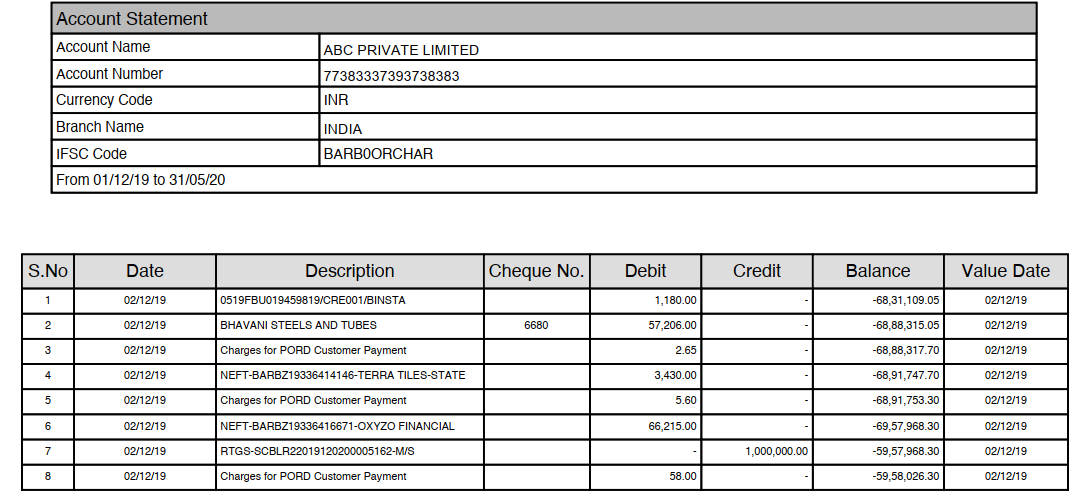

We have a bank statement for a customer in the PDF format. Each page converts a table on the details of transations like above.
The aim is to scrap data from the PDF to a python data frame and perform further data cleaning and exploratory data analysis. The first page contains two tables, first being about the customer information. The other pages include one table each on the transaction details.

In [140]:
# Importing the required Libraries
import PyPDF2
import tabula
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [141]:
# Reading file using PyPDF2 to find no. of pages
file = open('BankStatement.pdf', 'rb')
fileReader = PyPDF2.PdfFileReader(file)
# No. of Pages
print(fileReader.numPages)

22


In [142]:
# Reading tables from PDF and converting them to data frames.
from tabula import read_pdf
tables_from_pdf = tabula.read_pdf("BankStatement.pdf", encoding='utf-8',multiple_tables=True, pages='1-22')

In [143]:
# Appending all tables of the PDF
df= pd.DataFrame()
df=df.append(tables_from_pdf,ignore_index=True)

In [144]:
df.head(15)

,Account Statement,Unnamed: 0,S.No,Date,Description,Cheque No.,Debit,Credit,Balance,Value Date
0,Account Name,ABC PRIVATE LIMITED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Account Number,77383337393738383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Currency Code,INR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Branch Name,INDIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IFSC Code,BARB0ORCHAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,From 01/12/19 to 31/05/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,1.0,02/12/19,0519FBU019459819/CRE001/BINSTA,NaN,"1,180.00",-,"-68,31,109.05",02/12/19
7,NaN,NaN,2.0,02/12/19,BHAVANI STEELS AND TUBES,6680.0,"57,206.00",-,"-68,88,315.05",02/12/19
8,NaN,NaN,3.0,02/12/19,Charges for PORD Customer Payment,NaN,2.65,-,"-68,88,317.70",02/12/19
9,NaN,NaN,4.0,02/12/19,NEFT-BARBZ19336414146-TERRA TILES-STATE,NaN,"3,430.00",-,"-68,91,747.70",02/12/19


In [145]:
# Removing columns Account Statement, Unnamed: 0, and first six rows as these pertain to customer information, the first table
df.drop(['Account Statement', 'Unnamed: 0'],axis=1, inplace = True)
df = df.iloc[6:]

In [146]:
df.head()

,S.No,Date,Description,Cheque No.,Debit,Credit,Balance,Value Date
6,1.0,02/12/19,0519FBU019459819/CRE001/BINSTA,NaN,"1,180.00",-,"-68,31,109.05",02/12/19
7,2.0,02/12/19,BHAVANI STEELS AND TUBES,6680.0,"57,206.00",-,"-68,88,315.05",02/12/19
8,3.0,02/12/19,Charges for PORD Customer Payment,NaN,2.65,-,"-68,88,317.70",02/12/19
9,4.0,02/12/19,NEFT-BARBZ19336414146-TERRA TILES-STATE,NaN,"3,430.00",-,"-68,91,747.70",02/12/19
10,5.0,02/12/19,Charges for PORD Customer Payment,NaN,5.60,-,"-68,91,753.30",02/12/19


In [147]:
# convertin S.No column from float to int, and setting the column as index
import math
df['S.No']=df['S.No'].apply(np.int64)

In [148]:
df.head()

,S.No,Date,Description,Cheque No.,Debit,Credit,Balance,Value Date
6,1,02/12/19,0519FBU019459819/CRE001/BINSTA,NaN,"1,180.00",-,"-68,31,109.05",02/12/19
7,2,02/12/19,BHAVANI STEELS AND TUBES,6680.0,"57,206.00",-,"-68,88,315.05",02/12/19
8,3,02/12/19,Charges for PORD Customer Payment,NaN,2.65,-,"-68,88,317.70",02/12/19
9,4,02/12/19,NEFT-BARBZ19336414146-TERRA TILES-STATE,NaN,"3,430.00",-,"-68,91,747.70",02/12/19
10,5,02/12/19,Charges for PORD Customer Payment,NaN,5.60,-,"-68,91,753.30",02/12/19


In [149]:
df.shape

(930, 8)

In [150]:
# No Duplicates 
sum(df.duplicated())

0

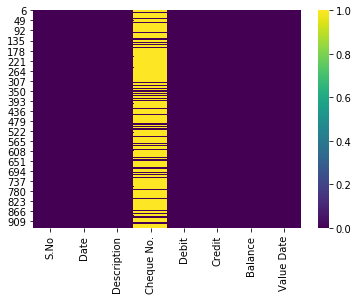

In [151]:
#checking for Null values
sns.heatmap(df.isnull(),cbar='False',cmap='viridis')

In [152]:
df.columns

Index(['S.No', 'Date', 'Description', 'Cheque No.', 'Debit', 'Credit',
       'Balance', 'Value Date'],
      dtype='object')

In [153]:
#missing value proportions
(df.isnull().sum()/len(df))*100

S.No            0.000000
Date            0.000000
Description     0.000000
Cheque No.     78.924731
Debit           0.000000
Credit          0.000000
Balance         0.000000
Value Date      0.000000
dtype: float64

In [154]:
#checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 6 to 935
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S.No         930 non-null    int64  
 1   Date         930 non-null    object 
 2   Description  930 non-null    object 
 3   Cheque No.   196 non-null    float64
 4   Debit        930 non-null    object 
 5   Credit       930 non-null    object 
 6   Balance      930 non-null    object 
 7   Value Date   930 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 58.3+ KB


In [155]:
# converting relevants columns to float type
df['Debit']=df['Debit'].str.replace(',','')
df['Credit']=df['Credit'].str.replace(',','')
df['Balance']=df['Balance'].str.replace(',','')

cols =['Debit', 'Credit','Balance']
for col in cols:
    df[col]=pd.to_numeric(df[col],downcast='float',errors='coerce')
# certain values coverted NA if only'-' present in the column

In [156]:
# covertind date columns to date time type
cols_date = ['Date', 'Value Date']
for col in cols_date:
    df[col]=pd.to_datetime(df[col])


In [157]:
df.head()

,S.No,Date,Description,Cheque No.,Debit,Credit,Balance,Value Date
6,1,2019-02-12,0519FBU019459819/CRE001/BINSTA,NaN,1180.00,NaN,-6831109.0,2019-02-12
7,2,2019-02-12,BHAVANI STEELS AND TUBES,6680.0,57206.00,NaN,-6888315.0,2019-02-12
8,3,2019-02-12,Charges for PORD Customer Payment,NaN,2.65,NaN,-6888317.5,2019-02-12
9,4,2019-02-12,NEFT-BARBZ19336414146-TERRA TILES-STATE,NaN,3430.00,NaN,-6891747.5,2019-02-12
10,5,2019-02-12,Charges for PORD Customer Payment,NaN,5.60,NaN,-6891753.5,2019-02-12


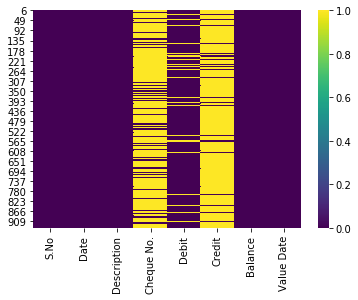

In [158]:
# checking for null values again
sns.heatmap(df.isnull(),cbar='False',cmap='viridis')

In [159]:
#Chagning NAN values in Credit or Debit, Cheque no as 0
df['Credit']=df['Credit'].fillna(0)
df['Debit']=df['Debit'].fillna(0)
df['Cheque No.'] =df['Cheque No.'].fillna(0)

In [160]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
S.No,930.0,4.655000e+02,2.686122e+02,1.0,233.25,465.50,697.75,930.0
Cheque No.,930.0,1.502637e+03,2.910694e+03,0.0,0.00,0.00,0.00,7650.0
Debit,930.0,7.629998e+04,2.123596e+05,0.0,29.00,9504.00,49332.50,2437573.0
Credit,930.0,7.542338e+04,4.204455e+05,0.0,0.00,0.00,0.00,8391275.0
Balance,930.0,-4.915864e+06,1.972571e+06,-7919411.0,-6337960.75,-5504723.75,-3532594.00,3097326.5


In [161]:
df.describe(include='object').transpose()

,count,unique,top,freq
Description,930,540,Charges for PORD Customer Payment,188


In [162]:
# Extracting first four letters from the description column to understand the type of transaction, NEFT, RTGS, IMPS etc
df['Type']=df['Description'].str[:4]

In [163]:
df['Type']

6      0519
7      BHAV
8      Char
9      NEFT
10     Char
       ... 
931    NEFT
932    NEFT
933    NEFT
934    Char
935    RTGS
Name: Type, Length: 930, dtype: object

In [164]:
# Creating Different categories based inputs
df['Cat1'] = np.where(df['Credit']>0,'Incoming ','Outgoing ')
df['Cat2']=np.where(df['Type']=='RETU','Returned ', 'NotReturned ')
df['Cat3']=np.where(df['Type']=='BOUN','Bounced ', 'Not Bounced ')

# create a list of our conditions
conditions= [
    (df['Type'] == 'NEFT'),
    (df['Type'] == 'RTGS'),
    (df['Type'] == 'IMPS')
    
    ]

# create a list of the values we want to assign for each condition
values = ['NEFT', 'RTGS', 'IMPS']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Cat4'] = np.select(conditions, values)
df['Cat4']=df['Cat4'].replace({'0':'Others'})

In [165]:
# Creating New Category - target, to help us classify a particular transaction
df['Category'] = df['Cat1'] + df['Cat2'] + df['Cat3'] + df['Cat4']
df=df.drop(['Cat1','Cat2','Cat3','Cat4'],axis=1)

In [166]:
df=df.set_index('S.No')

In [167]:
df.head()

,Date,Description,Cheque No.,Debit,Credit,Balance,Value Date,Type,Category
S.No,,,,,,,,,
1,2019-02-12,0519FBU019459819/CRE001/BINSTA,0.0,1180.00,0.0,-6831109.0,2019-02-12,0519,Outgoing NotReturned Not Bounced Others
2,2019-02-12,BHAVANI STEELS AND TUBES,6680.0,57206.00,0.0,-6888315.0,2019-02-12,BHAV,Outgoing NotReturned Not Bounced Others
3,2019-02-12,Charges for PORD Customer Payment,0.0,2.65,0.0,-6888317.5,2019-02-12,Char,Outgoing NotReturned Not Bounced Others
4,2019-02-12,NEFT-BARBZ19336414146-TERRA TILES-STATE,0.0,3430.00,0.0,-6891747.5,2019-02-12,NEFT,Outgoing NotReturned Not Bounced NEFT
5,2019-02-12,Charges for PORD Customer Payment,0.0,5.60,0.0,-6891753.5,2019-02-12,Char,Outgoing NotReturned Not Bounced Others
